In [3]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the HR dataset
df = pd.read_csv(r'https://github.com/LuckyBoy587/Statistical-Methods/raw/refs/heads/main/data/ML374_S8_Practice_HR_Data.csv')

# Create a categorical column for retention status
df['left_c'] = df['left'].map({0: 'Retained', 1: 'Left'})

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nSalary Distribution:")
print(df['salary'].value_counts())
print("\nRetention Status:")
print(df['left_c'].value_counts())

Dataset Shape: (14999, 11)

Column Names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary', 'left_c']

Salary Distribution:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Retention Status:
left_c
Retained    11428
Left         3571
Name: count, dtype: int64


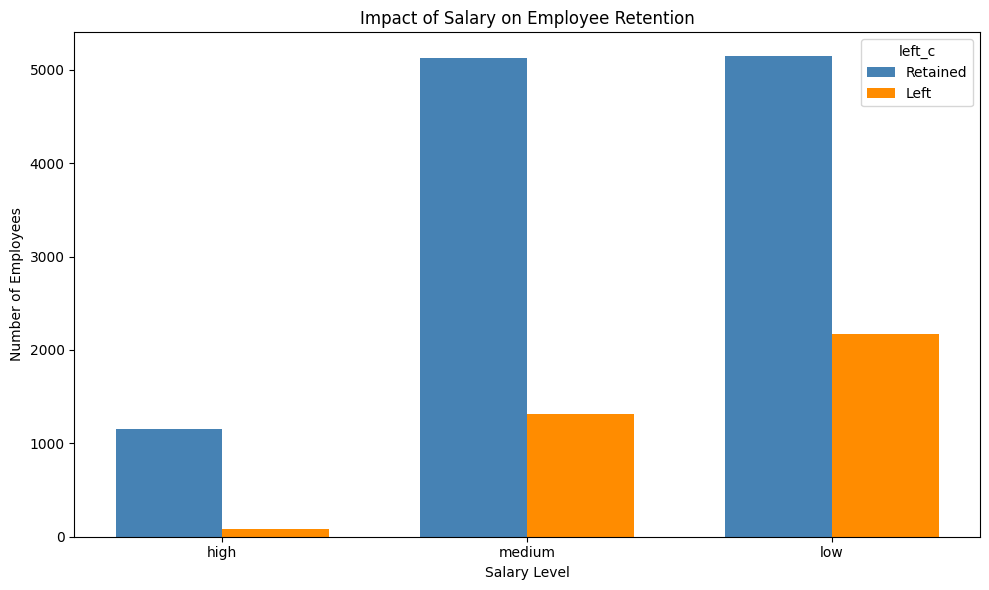


Salary vs Retention Crosstab:
left_c  Left  Retained
salary                
high      82      1155
medium  1317      5129
low     2172      5144


In [8]:
# 1. Salary vs Employee Retention - Bar Chart
# Create a cross-tabulation of salary and retention status
salary_retention = pd.crosstab(df['salary'], df['left_c'])

# Define salary order for proper display
salary_order = ['low', 'medium', 'high'][::-1]
salary_retention = salary_retention.reindex(salary_order)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(salary_order))
width = 0.35

bars1 = ax.bar(x - width/2, salary_retention['Retained'], width, label='Retained', color='steelblue')
bars2 = ax.bar(x + width/2, salary_retention['Left'], width, label='Left', color='darkorange')

ax.set_xlabel('Salary Level')
ax.set_ylabel('Number of Employees')
ax.set_title('Impact of Salary on Employee Retention')
ax.set_xticks(x)
ax.set_xticklabels(salary_order)
ax.legend(title='left_c')

plt.tight_layout()
plt.show()

print("\nSalary vs Retention Crosstab:")
print(salary_retention)

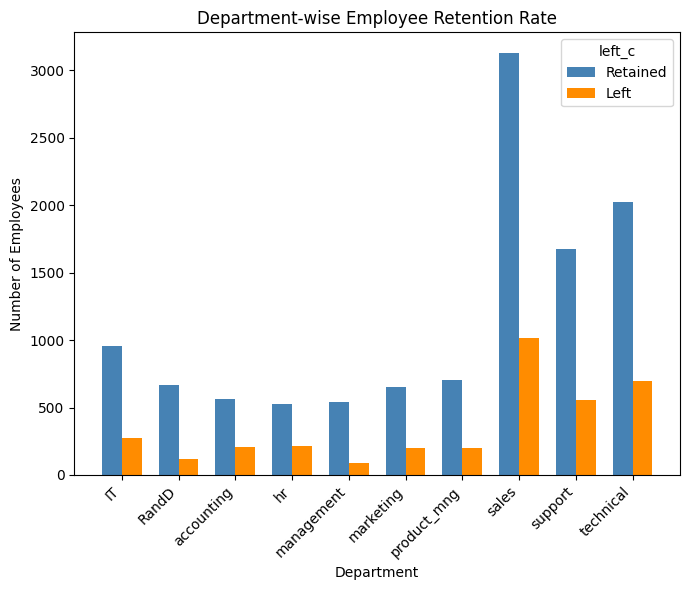


Department-wise Retention Crosstab:
left_c       Left  Retained
Department                 
IT            273       954
RandD         121       666
accounting    204       563
hr            215       524
management     91       539
marketing     203       655
product_mng   198       704
sales        1014      3126
support       555      1674
technical     697      2023


In [7]:
# 2. Department-wise Retention Rate - Bar Chart
# Create a cross-tabulation of department and retention status
dept_retention = pd.crosstab(df['Department'], df['left_c'])

# Sort by department name for consistent display
dept_retention = dept_retention.sort_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(7, 6))

x = np.arange(len(dept_retention.index))
width = 0.35

bars1 = ax.bar(x - width/2, dept_retention['Retained'], width, label='Retained', color='steelblue')
bars2 = ax.bar(x + width/2, dept_retention['Left'], width, label='Left', color='darkorange')

ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')
ax.set_title('Department-wise Employee Retention Rate')
ax.set_xticks(x)
ax.set_xticklabels(dept_retention.index, rotation=45, ha='right')
ax.legend(title='left_c')

plt.tight_layout()
plt.show()

print("\nDepartment-wise Retention Crosstab:")
print(dept_retention)